In [1]:
import cvxpy as cp
import numpy as np
import osbdo as ob

(CVXPY) Oct 12 10:01:02 AM: Encountered unexpected exception importing solver SCS:
ImportError('dlopen(/opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/_scs_direct.cpython-310-darwin.so, 2): Symbol not found: _aligned_alloc\n  Referenced from: /opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/scs/.dylibs/libgomp.1.dylib (which was built for Mac OS X 10.15)\n  Expected in: /usr/lib/libSystem.B.dylib\n in /opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/scs/.dylibs/libgomp.1.dylib')


# Problem description
section 4.2 in https://web.stanford.edu/~boyd/papers/os_bundle_distr_opt.html 

# Create parameters

In [2]:
params, R = ob.ra_params(num_resources=50, num_agents=50, num_participants=500)

# Distributed solution

In [3]:
agents = ob.ra_agents(params=params)
g = ob.ra_coupling(agents, R)
prob = ob.Problem(agents = agents, g = g)

In [4]:
x_agent, x_global = prob.solve(rel_gap=10**(-5), abs_gap=10**(-5), max_iter=50)

/opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/cvxpy-1.3.0-py3.10-macosx-10.9-x86_64.egg/cvxpy/problems/problem.py:1358: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


k=0, rel_gap=240.62829809898264, L=-1117644.058895553, U=-4625.468406178617
k=1, rel_gap=0.1776325587958375, L=-5447.10219479743, U=-4625.468406178617
k=2, rel_gap=0.08957118954661286, L=-5438.840514414536, U=-4991.725705116818
k=3, rel_gap=0.05859841682222402, L=-5434.358829690953, U=-5133.541429245849
k=4, rel_gap=0.04700354142336397, L=-5430.039922556824, U=-5186.267006484886
k=5, rel_gap=0.04294490122096641, L=-5427.9954620594435, U=-5204.489187976217
k=6, rel_gap=0.04129119500224207, L=-5426.033996428036, U=-5210.870909569491
k=7, rel_gap=0.04014585530699771, L=-5423.524219030637, U=-5214.195866242135
k=8, rel_gap=0.03963565421758358, L=-5420.863930619262, U=-5214.195866242135
k=9, rel_gap=0.03851721159322609, L=-5416.301253020064, U=-5215.4178982847325
k=10, rel_gap=0.03741923542185823, L=-5413.00340892918, U=-5217.758861708426
k=11, rel_gap=0.03638685259639261, L=-5409.314079683992, U=-5219.396662677058
k=12, rel_gap=0.035321277483846274, L=-5405.644007727289, U=-5221.2237160475

/opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/cvxpy-1.3.0-py3.10-macosx-10.9-x86_64.egg/cvxpy/problems/problem.py:154: UserWarning: Objective contains too many subexpressions. Consider vectorizing your CVXPY code to speed up compilation.
  warnings.warn("Objective contains too many subexpressions. "


k=15, rel_gap=0.031493786912200235, L=-5390.14282903328, U=-5225.5698458143825


/opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/cvxpy-1.3.0-py3.10-macosx-10.9-x86_64.egg/cvxpy/problems/problem.py:160: UserWarning: Constraint #0 contains too many subexpressions. Consider vectorizing your CVXPY code to speed up compilation.
  warnings.warn(f"Constraint #{i} contains too many subexpressions. "


k=16, rel_gap=0.03044304552186117, L=-5387.018592685365, U=-5227.866417359481
k=17, rel_gap=0.0294762915975742, L=-5381.964532310734, U=-5227.866417359481
k=18, rel_gap=0.028711364183182576, L=-5379.490368387805, U=-5229.348635279467
k=19, rel_gap=0.027925432742635124, L=-5376.958026165425, U=-5230.883345126524
k=20, rel_gap=0.027193188943735968, L=-5373.8765595239865, U=-5231.612336769825
k=21, rel_gap=0.026161879652434286, L=-5372.092912995683, U=-5235.1320191461755
k=22, rel_gap=0.024887175857854903, L=-5366.699798791368, U=-5236.381062431885
k=23, rel_gap=0.024000037594324446, L=-5362.054404788459, U=-5236.381062431885
k=24, rel_gap=0.022909451932537375, L=-5356.343682682117, U=-5236.381062431885
k=25, rel_gap=0.02240676250756601, L=-5353.711409296912, U=-5236.381062431885
k=26, rel_gap=0.021567432252335202, L=-5349.316356243296, U=-5236.381062431885
k=27, rel_gap=0.02080650404681285, L=-5345.955406337923, U=-5236.9919129088585
k=28, rel_gap=0.02043456537444258, L=-5345.17121285967

# Centralized solution

In [5]:
h_cvx, x_cvx = ob.cvx_resource_allocation(params=params, R=R)

In [6]:
h_cvx, prob.upper_bnd[-1]

(-5302.923713453543, -5273.511351107376)

# Plot

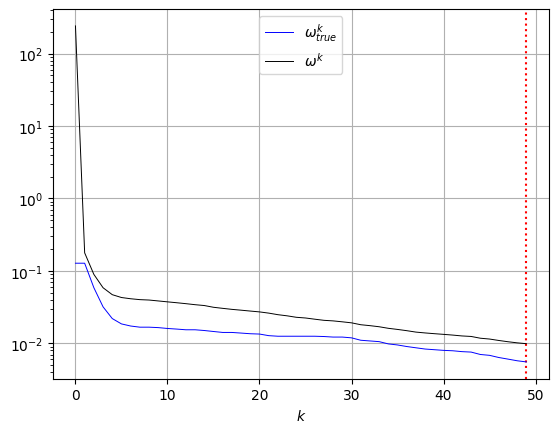

In [7]:
ob.plot_true_rel_gap_uk(lk = prob.lower_bnd, uk = prob.upper_bnd, h_true = h_cvx)